Problem 1:
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance

Problem 2:
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.

Problem 3:
Identify which all stocks are moving together and which all stocks are different from
each other.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv('data_stocks.csv')

In [3]:
## transpose the data set for grouping each company
df = data.T[:][2:]
df

,0,1,2,3,4,5,6,7,8,9,...,41256,41257,41258,41259,41260,41261,41262,41263,41264,41265
NASDAQ.AAL,42.33,42.36,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.390,42.330,...,44.720,44.7300,44.7600,44.750,44.710,44.720,44.730,44.740,44.7100,44.74
NASDAQ.AAPL,143.68,143.70,143.6901,143.6400,143.6600,143.7800,143.864,143.81,143.815,143.800,...,164.160,164.0600,164.1900,164.200,164.140,164.110,164.120,164.010,163.8800,163.98
NASDAQ.ADBE,129.63,130.32,130.2250,130.0729,129.8800,130.0700,130.180,130.14,130.100,130.210,...,155.060,155.0100,155.1200,155.090,155.040,155.090,155.160,155.065,154.9600,155.16
NASDAQ.ADI,82.04,82.08,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.230,82.165,...,83.710,83.7000,83.6300,83.690,83.660,83.670,83.650,83.620,83.5800,83.69
NASDAQ.ADP,102.23,102.14,102.2125,102.1400,102.0600,102.0400,102.330,102.37,102.380,102.330,...,106.620,106.5600,106.6200,106.600,106.630,106.565,106.590,106.520,106.4000,106.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NYSE.XRX,7.36,7.38,7.3600,7.3500,7.3600,7.3600,7.365,7.36,7.370,7.365,...,32.290,32.2950,32.3000,32.295,32.295,32.285,32.295,32.290,32.2750,32.27
NYSE.XYL,50.22,50.22,50.1200,50.1600,50.2000,50.2000,50.330,50.30,50.250,50.220,...,62.060,62.1000,62.1050,62.105,62.095,62.110,62.100,62.090,62.0750,62.07
NYSE.YUM,63.86,63.74,63.7500,63.8800,63.9100,63.8400,63.830,63.83,63.850,63.840,...,76.815,76.8100,76.8799,76.910,76.885,76.880,76.900,76.880,76.8300,76.81
NYSE.ZBH,122.00,121.77,121.7000,121.7000,121.6950,121.8500,122.100,122.28,121.875,121.930,...,114.360,114.3100,114.3500,114.320,114.300,114.310,114.330,114.310,114.2300,114.28


In [4]:
## missing val 
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

(array([462.,  28.,   4.,   0.,   5.,   0.,   0.,   0.,   0.,   1.]),
 array([   6.01 ,  183.035,  360.06 ,  537.085,  714.11 ,  891.135,
        1068.16 , 1245.185, 1422.21 , 1599.235, 1776.26 ]),
 <BarContainer object of 10 artists>)

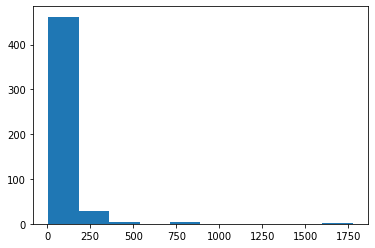

In [5]:
## data seems to be log-normal distributed 
plt.hist(df[0])

(array([  3.,  19.,  45., 126., 168., 101.,  27.,   5.,   5.,   1.]),
 array([1.79342475, 2.3623088 , 2.93119286, 3.50007692, 4.06896097,
        4.63784503, 5.20672908, 5.77561314, 6.3444972 , 6.91338125,
        7.48226531]),
 <BarContainer object of 10 artists>)

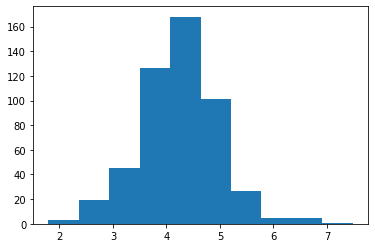

In [6]:
plt.hist(np.log(df[0]))

In [7]:
## data transformation and data scaling 
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log)
transformed_df = log_transformer.fit_transform(df)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(transformed_df)

(array([  3.,  19.,  45., 126., 168., 101.,  27.,   5.,   5.,   1.]),
 array([-3.34710118, -2.57093462, -1.79476806, -1.0186015 , -0.24243494,
         0.53373162,  1.30989818,  2.08606474,  2.8622313 ,  3.63839786,
         4.41456442]),
 <BarContainer object of 10 artists>)

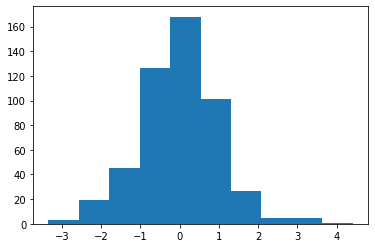

In [9]:
plt.hist(scaled_df[:,0])

In [10]:
## apply pca to reduce to 2d dimension 
from sklearn.decomposition import PCA
pca = PCA()
allPrincipalComponents = pca.fit_transform(scaled_df)

Text(0.5, 1.0, 'Explained Variance')

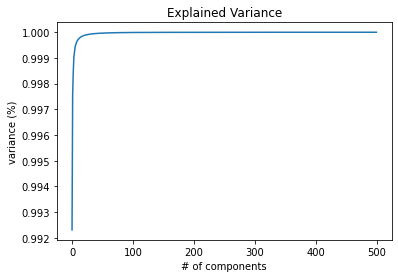

In [11]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('variance (%)')
plt.title('Explained Variance')

In [12]:
pca.explained_variance_ratio_[0]
## most of the variance can be attributed to first component

0.9923036544979734

In [13]:
## build new pca model
pca = PCA(n_components=2)
twoPrincipalComponentsData = pca.fit_transform(scaled_df)

In [14]:
twoPrincipalComponentsData.shape

(500, 2)

In [15]:
pca.explained_variance_ratio_

array([0.99230365, 0.00527429])

Text(0, 0.5, 'Second Component')

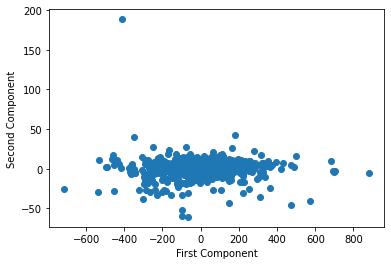

In [16]:
## ploting the 2d data 
plt.scatter(twoPrincipalComponentsData[:,0],twoPrincipalComponentsData[:,1])
plt.xlabel('First Component')
plt.ylabel('Second Component')


In [17]:
## eblow method choosing # of cluster 
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=422)
    kmeans.fit(twoPrincipalComponentsData)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'The Elbow Method')

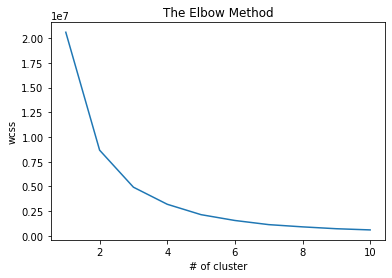

In [18]:
plt.plot(range(1,11),wcss)
plt.xlabel('# of cluster')
plt.ylabel('wcss')
plt.title('The Elbow Method')

In [19]:
## model building -- k-mean 
## measure performace of the algo -- checking k=3 to k = 5
from sklearn.metrics import silhouette_score
for i in range(3,6):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=422)
    labels = kmeans.fit_predict(twoPrincipalComponentsData)
    dataWithLabel = pd.DataFrame(twoPrincipalComponentsData,columns=['First','Second'],index=df.index)
    dataWithLabel['Label'] = labels 
    print(f"Silhouette Coefficient:{silhouette_score(dataWithLabel[['First','Second']], dataWithLabel['Label']):.3f}")
## best in k = 3

Silhouette Coefficient:0.519
Silhouette Coefficient:0.513
Silhouette Coefficient:0.503


In [20]:
kmeans = KMeans(n_clusters = 3,init='k-means++',random_state=422)
labels = kmeans.fit_predict(twoPrincipalComponentsData)
dataWithLabel = pd.DataFrame(twoPrincipalComponentsData,columns=['First','Second'],index=df.index)
dataWithLabel['Label'] = labels 

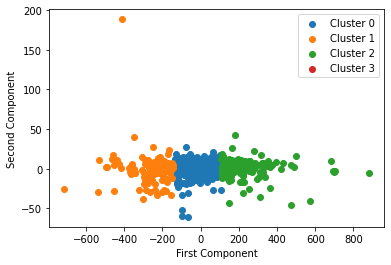

In [21]:
# visualize the cluster 
for i in range(4):
    plt.scatter(dataWithLabel[dataWithLabel['Label'] == i]['First'],
                dataWithLabel[dataWithLabel['Label'] == i]['Second'],label = f'Cluster {i}')

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()

In [22]:
## heatmap to find the pattern of data 
import seaborn as sns 

<AxesSubplot:>

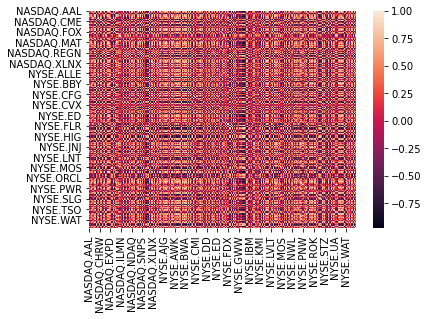

In [23]:
dataCorr = data.iloc[:,2:].corr()
sns.heatmap(dataCorr)

In [24]:
## create heatmap for data in same cluster 

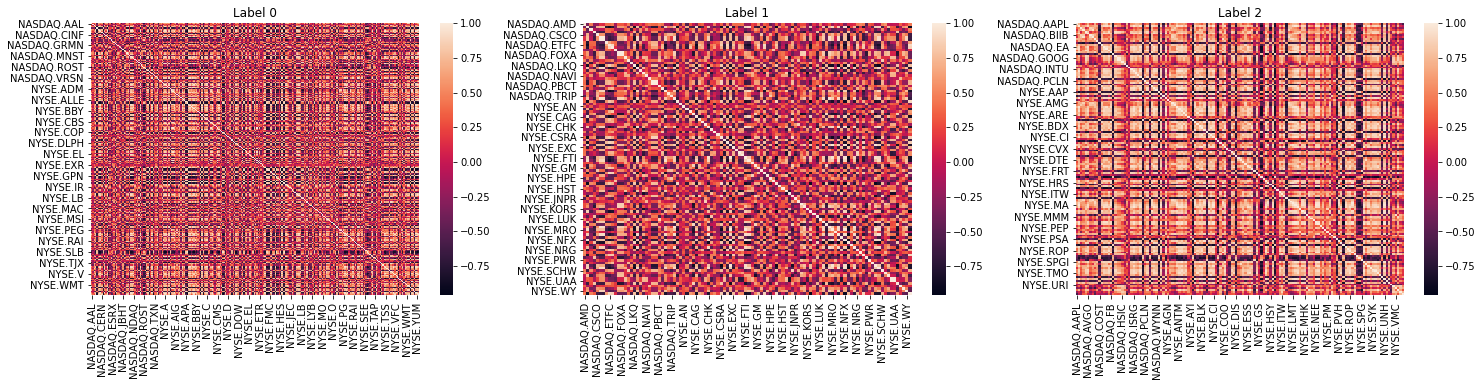

In [25]:
fig, axs = plt.subplots(1,3,figsize = (25,5))
for i in range(3):
    axs[i].set_title(f'Label {i}')
    sns.heatmap(df[dataWithLabel['Label'] == i].T.corr(),ax = axs[i])

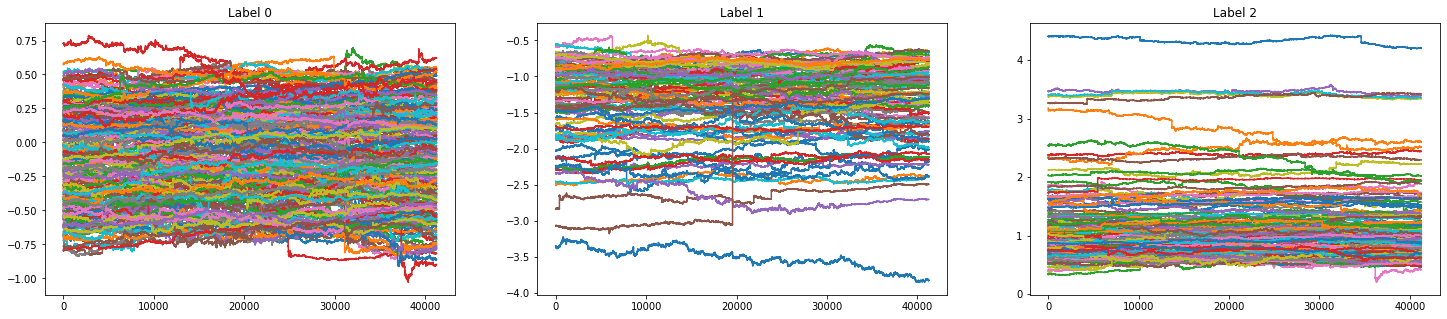

In [26]:
## plot the trend of data in same cluster 
fig, axs = plt.subplots(1,3,figsize = (25,5))
for i in range(3):
    axs[i].set_title(f'Label {i}')
    axs[i].plot(scaled_df[dataWithLabel['Label'] == i].T)

In [27]:
## use another model hierarchical Clustering 
from sklearn.cluster import AgglomerativeClustering
clusteringModel = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
clusteringModel.fit(twoPrincipalComponentsData)


AgglomerativeClustering(distance_threshold=0, n_clusters=None)

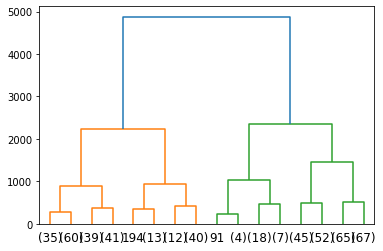

In [28]:
## visual the dendrogram

from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
plot_dendrogram(clusteringModel, truncate_mode='level', p=3)
## seem # of cluster = 2/4/8 is a good choice

In [29]:
for i in [2,4,8]:
    clusteringModel = AgglomerativeClustering(n_clusters=i)
    clusteringModel.fit(twoPrincipalComponentsData)
    dataWithLabel = pd.DataFrame(twoPrincipalComponentsData,columns=['First','Second'],index=df.index)
    dataWithLabel['Label'] = clusteringModel.labels_ 
    print(f"Silhouette Coefficient:{silhouette_score(dataWithLabel[['First','Second']], dataWithLabel['Label']):.3f}")

Silhouette Coefficient:0.524
Silhouette Coefficient:0.498
Silhouette Coefficient:0.497


In [58]:
clusteringModel = AgglomerativeClustering(n_clusters=8)
clusteringModel.fit(twoPrincipalComponentsData)
dataWithLabel = pd.DataFrame(twoPrincipalComponentsData,columns=['First','Second'],index=df.index)
dataWithLabel['Label'] = clusteringModel.labels_ 

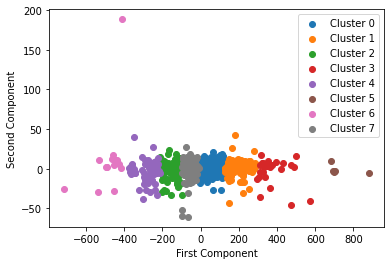

In [59]:
# visualize the cluster 
for i in range(8):
    plt.scatter(dataWithLabel[dataWithLabel['Label'] == i]['First'],
                dataWithLabel[dataWithLabel['Label'] == i]['Second'],label = f'Cluster {i}')

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()

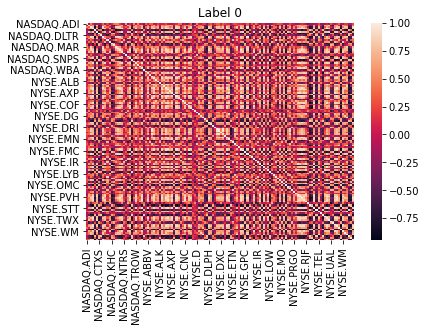

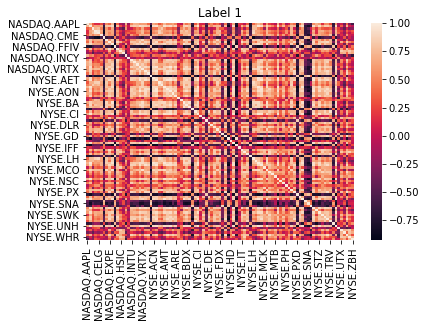

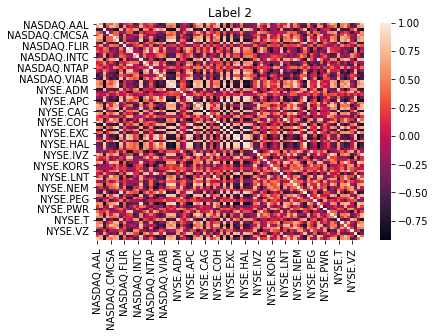

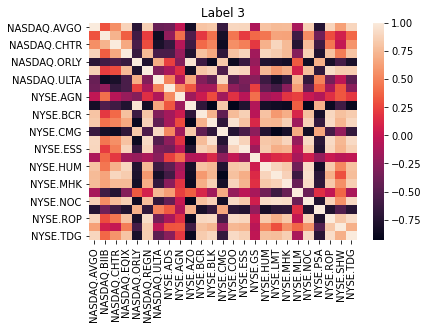

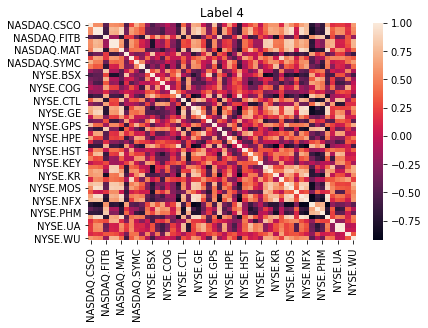

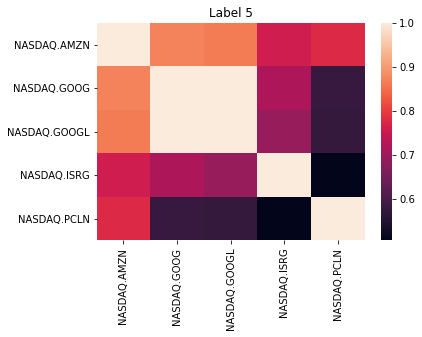

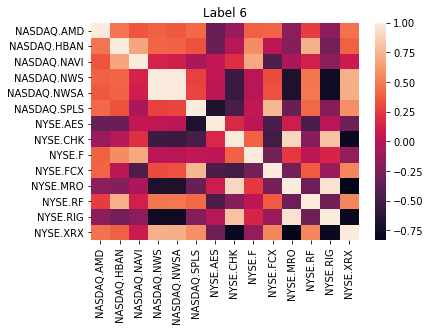

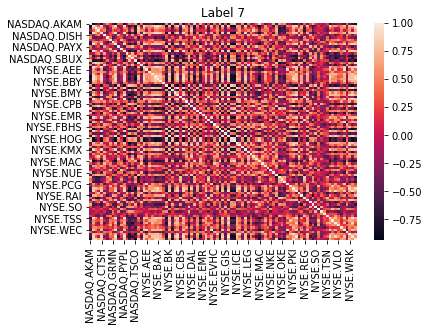

In [65]:
for i in range(8):
    fig, ax = plt.subplots()
    ax.set_title(f'Label {i}')
    sns.heatmap(df[dataWithLabel['Label'] == i].T.corr(),ax = ax)

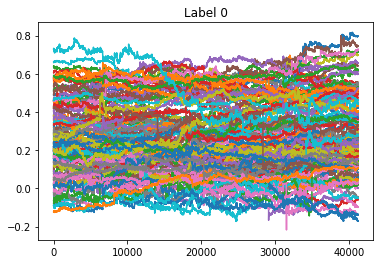

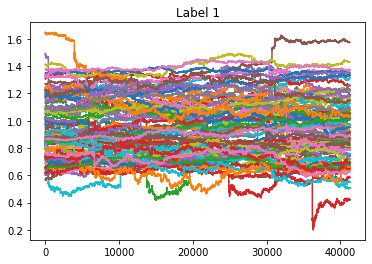

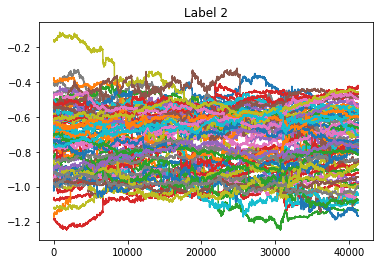

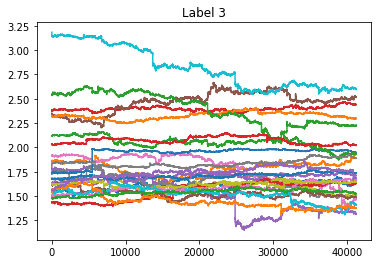

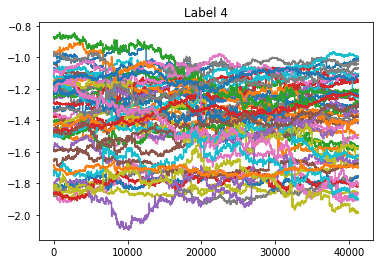

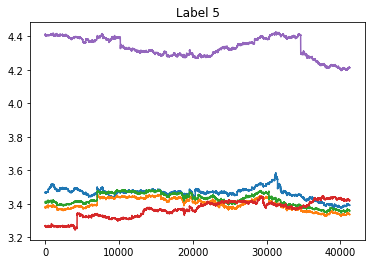

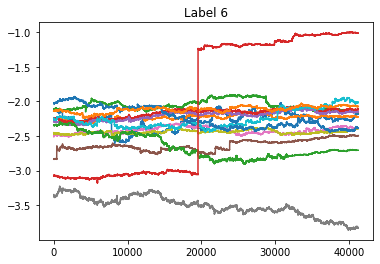

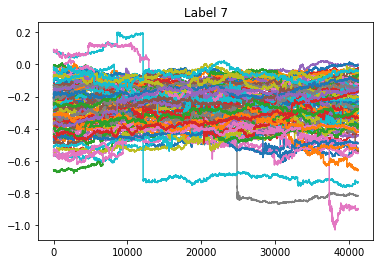

In [66]:
## plot the trend of data in same cluster 
for i in range(8):
    fig, ax = plt.subplots()
    ax.set_title(f'Label {i}')
    ax.plot(scaled_df[dataWithLabel['Label'] == i].T)